<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/14-1-Perceptron-Multicapa-Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón Multicapa: Regresión
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar un perceptrón multicapa en un problema de regresión. Se utilizará la librería `scikit-learn` mediante la API de `Keras`.



Los paquetes necesarios son:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError


In [2]:
# Fijar las semillas para reproducibilidad
import random
import os
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

---
## <font color='264CC7'> Ejemplo 1</font>

Generamos datos que sigan una tendencia lineal:

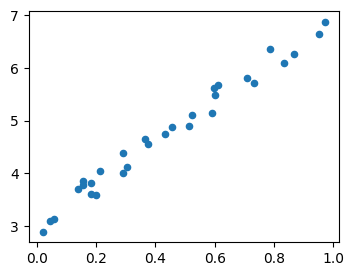

In [3]:
# Generamos los datos
np.random.seed(42)
m = 30
X = np.random.rand(m)
y = 4*X + 3 + (np.random.rand(m)-0.5)*0.5

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.show()

### <font color='264CC7'> Definición de la red </font>

Generemos una red de una solo neurona con una sola capa oculta.

In [4]:
# Creamos el modelo
set_seed(42)
model = Sequential([
    Input(shape=(1,)),               
    Dense(1, activation='linear')  
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color='264CC7'> Entrenamiento </font>

Entrenamos la red:

In [5]:
# Entrenar el modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Visualizo los parámetros
print("w =", model.get_weights()[0])
print("b =", model.get_weights()[1])

w = [[3.6254175]]
b = [3.170913]


Visualicemos el entrenamiento:

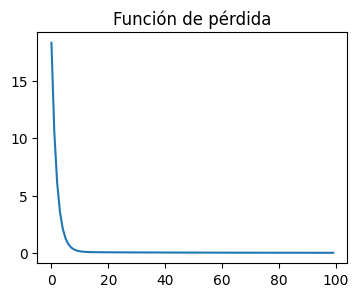

In [6]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Visualizo los resultados:

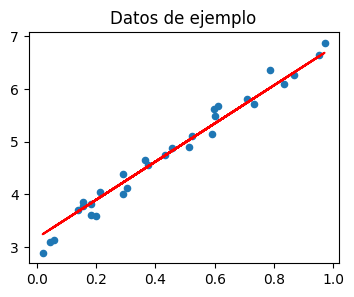

In [7]:
# Realizo las predicciones
y_pred = model.predict(X, verbose=0)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.plot(X, y_pred, color='red')
plt.title('Datos de ejemplo')
plt.show()

---
## <font color='264CC7'> Ejemplo 2</font>

Generamos datos que sigan una tendencia cuadrática:

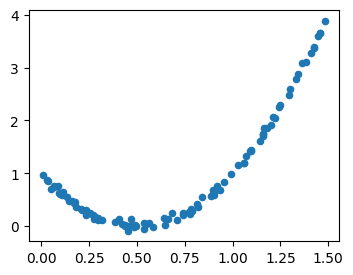

In [8]:
# Generamos los datos
np.random.seed(42)
m = 100
X = 1.5*np.random.rand(m) 
X = np.sort(X)
y = 4*X**2 - 4*X + 1 + 0.05*np.random.randn(m)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.show()

### <font color='264CC7'> Definición de la red </font>

Generemos una red de una solo neurona con una sola capa oculta.

In [9]:
# Creamos el modelo
set_seed(75)
model = Sequential([
    Input(shape=(1,)),               
    Dense(1, activation='linear')  
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color='264CC7'> Entrenamiento </font>

Entrenamos la red y visualizamos el entrenamiento:

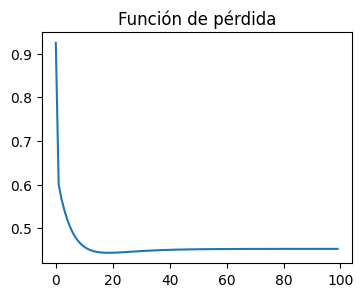

In [10]:
# Entrenar el modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Visualizo los resultados:

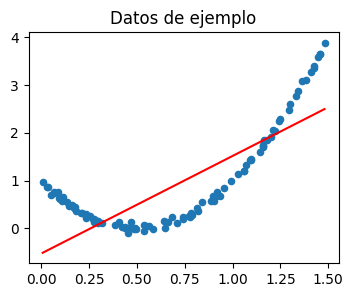

In [11]:
# Realizo las predicciones
y_pred = model.predict(X, verbose=0)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.plot(X, y_pred, color='red')
plt.title('Datos de ejemplo')
plt.show()

### <font color='264CC7'> Definición de otra red </font>

Generemos una red de una capa oculta.

In [12]:
# Creamos el modelo
set_seed(75)
model = Sequential([
    Input(shape=(1,)),               
    Dense(1, activation='relu'),
    Dense(1, activation='linear')
])
# Compilamos el modelo
optimizer = SGD(learning_rate=0.01)
loss = MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### <font color='264CC7'> Entrenamiento </font>

Entrenamos la red:

In [13]:
# Entrenar el modelo
history = model.fit(X, y, epochs=200, verbose=0)

# Visualizo los parámetros
print("w1 =", model.get_weights()[0])
print("b1 =", model.get_weights()[1])
print("w2 =", model.get_weights()[2])
print("b2 =", model.get_weights()[3])

w1 = [[1.6706669]]
b1 = [-1.1463412]
w2 = [[2.1853547]]
b2 = [0.19748451]


Visualicemos el entrenamiento:

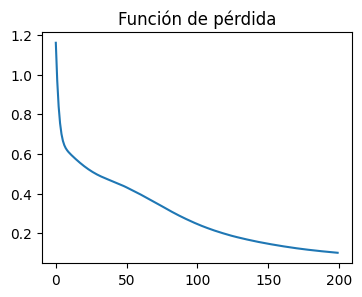

In [14]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Visualizo los resultados:

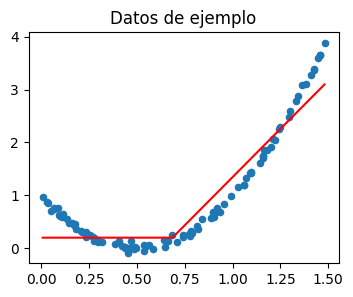

In [15]:
# Realizo las predicciones
y_pred = model.predict(X, verbose=0)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.plot(X, y_pred, color='red')
plt.title('Datos de ejemplo')
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Cambia la arquitectura de la red y las funciones de activación hasta obtener un mejor ajuste. Puedes probar esta página para visualizar las arquitecturas de las redes: <a href="https://www.cs.cmu.edu/~pvirtue/tfp/" target="_blank">https://www.cs.cmu.edu/~pvirtue/tfp/</a>
</div>